In [1]:
# colab 연결용
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
from torchvision import transforms

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)

In [5]:
from torch import nn

In [6]:
# Feedforward Model
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
  def forward(self, x):
    outputs = self.linear_relu_stack(x)
    return outputs

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 20
criterion = nn.CrossEntropyLoss().to(device)

optimizer_names = ["SGD","SGD+Momentum","SGD+Nestrov","AdaGrad","RMSProp","Adam"]
loss_save_arrs = {optimizer_name:[] for optimizer_name in optimizer_names}

In [49]:
def train(model, optimizer, loss_save_arr):
  for epoch in range(epochs):
    for batch_idx, (X_train, y_train) in enumerate(train_dataloader):
      # Train
      model.train()
      optimizer.zero_grad()
      X_train = X_train.to(device)
      y_train = y_train.to(device)
      pred = model(X_train)
      loss = criterion(pred, y_train)

      loss.backward()
      optimizer.step()
      
      if batch_idx % 100 == 0:
        loss, current = loss.item(), batch_idx * len(X_train)
        print(f"loss : {loss::>7f} [{current:>5d}/{len(train_dataloader.dataset):>5d}]")
        
    test_loss, correct = 0,0
    model.eval()
    with torch.no_grad():
      for X_test,y_test in test_dataloader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        pred = model(X_test)
        test_loss += criterion(pred,y_test).item()
        correct += (pred.argmax(1) == y_test).type(torch.float).sum().item()
      test_loss /= len(test_dataloader)
      correct /= len(test_dataloader.dataset)
      print(f"Test Error:\n Accurancy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8}\n")
      loss_save_arr.append(test_loss)

In [50]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
loss_save_arr = loss_save_arrs[optimizer_names[0]]
train(model, optimizer,loss_save_arr)

loss : 2.428808 [    0/60000]
loss : 1.412792 [ 6400/60000]
loss : 1.127440 [12800/60000]
loss : 0.863532 [19200/60000]
loss : 0.907471 [25600/60000]
loss : 0.808949 [32000/60000]
loss : 0.838084 [38400/60000]
loss : 0.686691 [44800/60000]
loss : 0.833519 [51200/60000]
loss : 0.739805 [57600/60000]
Test Error:
 Accurancy: 79.3%, Avg loss: 0.6472053514487708

loss : 0.801386 [    0/60000]
loss : 0.725647 [ 6400/60000]
loss : 0.577975 [12800/60000]
loss : 0.586383 [19200/60000]
loss : 0.601168 [25600/60000]
loss : 0.660115 [32000/60000]
loss : 0.834786 [38400/60000]
loss : 0.595306 [44800/60000]
loss : 0.458545 [51200/60000]
loss : 0.620577 [57600/60000]
Test Error:
 Accurancy: 82.5%, Avg loss: 0.5254715061518175

loss : 0.458697 [    0/60000]
loss : 0.494823 [ 6400/60000]
loss : 0.537528 [12800/60000]
loss : 0.548150 [19200/60000]
loss : 0.465907 [25600/60000]
loss : 0.410856 [32000/60000]
loss : 0.717268 [38400/60000]
loss : 0.653144 [44800/60000]
loss : 0.414033 [51200/60000]
loss : 0

In [51]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9)
loss_save_arr = loss_save_arrs[optimizer_names[1]]
train(model, optimizer,loss_save_arr)

loss : 2.456805 [    0/60000]
loss : 0.580219 [ 6400/60000]
loss : 0.773397 [12800/60000]
loss : 0.541985 [19200/60000]
loss : 0.302801 [25600/60000]
loss : 0.374309 [32000/60000]
loss : 0.404449 [38400/60000]
loss : 0.389789 [44800/60000]
loss : 0.375896 [51200/60000]
loss : 0.371205 [57600/60000]
Test Error:
 Accurancy: 87.2%, Avg loss: 0.36512045308089713

loss : 0.527113 [    0/60000]
loss : 0.449115 [ 6400/60000]
loss : 0.310587 [12800/60000]
loss : 0.475227 [19200/60000]
loss : 0.419807 [25600/60000]
loss : 0.289969 [32000/60000]
loss : 0.462837 [38400/60000]
loss : 0.186885 [44800/60000]
loss : 0.202253 [51200/60000]
loss : 0.205409 [57600/60000]
Test Error:
 Accurancy: 88.9%, Avg loss: 0.3112494482605188

loss : 0.270591 [    0/60000]
loss : 0.345728 [ 6400/60000]
loss : 0.447206 [12800/60000]
loss : 0.374092 [19200/60000]
loss : 0.251006 [25600/60000]
loss : 0.306383 [32000/60000]
loss : 0.280455 [38400/60000]
loss : 0.345069 [44800/60000]
loss : 0.259358 [51200/60000]
loss : 

In [52]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9,nesterov=True)
loss_save_arr = loss_save_arrs[optimizer_names[2]]
train(model, optimizer,loss_save_arr)

loss : 2.363610 [    0/60000]
loss : 0.591483 [ 6400/60000]
loss : 0.463697 [12800/60000]
loss : 0.538579 [19200/60000]
loss : 0.447540 [25600/60000]
loss : 0.577896 [32000/60000]
loss : 0.308787 [38400/60000]
loss : 0.419213 [44800/60000]
loss : 0.701672 [51200/60000]
loss : 0.535646 [57600/60000]
Test Error:
 Accurancy: 87.2%, Avg loss: 0.364626980682553

loss : 0.266633 [    0/60000]
loss : 0.424783 [ 6400/60000]
loss : 0.356500 [12800/60000]
loss : 0.512769 [19200/60000]
loss : 0.256971 [25600/60000]
loss : 0.345851 [32000/60000]
loss : 0.312334 [38400/60000]
loss : 0.356255 [44800/60000]
loss : 0.283281 [51200/60000]
loss : 0.166134 [57600/60000]
Test Error:
 Accurancy: 89.0%, Avg loss: 0.30595344823719595

loss : 0.275532 [    0/60000]
loss : 0.305815 [ 6400/60000]
loss : 0.190163 [12800/60000]
loss : 0.296059 [19200/60000]
loss : 0.255068 [25600/60000]
loss : 0.248570 [32000/60000]
loss : 0.371553 [38400/60000]
loss : 0.307335 [44800/60000]
loss : 0.251488 [51200/60000]
loss : 0

In [53]:
model = MLP().to(device)
optimizer = torch.optim.Adagrad(model.parameters(), lr=lr)
loss_save_arr = loss_save_arrs[optimizer_names[3]]
train(model, optimizer,loss_save_arr)

loss : 2.384367 [    0/60000]
loss : 0.588722 [ 6400/60000]
loss : 0.454778 [12800/60000]
loss : 0.437681 [19200/60000]
loss : 0.402438 [25600/60000]
loss : 0.368418 [32000/60000]
loss : 0.342317 [38400/60000]
loss : 0.413515 [44800/60000]
loss : 0.506300 [51200/60000]
loss : 0.418290 [57600/60000]
Test Error:
 Accurancy: 87.9%, Avg loss: 0.3440671838692892

loss : 0.473476 [    0/60000]
loss : 0.309633 [ 6400/60000]
loss : 0.224346 [12800/60000]
loss : 0.282404 [19200/60000]
loss : 0.384791 [25600/60000]
loss : 0.342140 [32000/60000]
loss : 0.245448 [38400/60000]
loss : 0.465163 [44800/60000]
loss : 0.303370 [51200/60000]
loss : 0.264779 [57600/60000]
Test Error:
 Accurancy: 89.2%, Avg loss: 0.3064911489420608

loss : 0.293673 [    0/60000]
loss : 0.414720 [ 6400/60000]
loss : 0.378172 [12800/60000]
loss : 0.429800 [19200/60000]
loss : 0.365985 [25600/60000]
loss : 0.236611 [32000/60000]
loss : 0.230001 [38400/60000]
loss : 0.476610 [44800/60000]
loss : 0.237901 [51200/60000]
loss : 0

In [54]:
model = MLP().to(device)
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
loss_save_arr = loss_save_arrs[optimizer_names[4]]
train(model, optimizer,loss_save_arr)

loss : 2.354221 [    0/60000]
loss : 0.379254 [ 6400/60000]
loss : 0.595856 [12800/60000]
loss : 0.596599 [19200/60000]
loss : 0.399351 [25600/60000]
loss : 0.589416 [32000/60000]
loss : 0.346941 [38400/60000]
loss : 0.338618 [44800/60000]
loss : 0.415911 [51200/60000]
loss : 0.286025 [57600/60000]
Test Error:
 Accurancy: 81.3%, Avg loss: 0.5716993751238658

loss : 0.506966 [    0/60000]
loss : 0.336604 [ 6400/60000]
loss : 0.252877 [12800/60000]
loss : 0.424917 [19200/60000]
loss : 0.542560 [25600/60000]
loss : 0.245782 [32000/60000]
loss : 0.322017 [38400/60000]
loss : 0.283775 [44800/60000]
loss : 0.360307 [51200/60000]
loss : 0.436733 [57600/60000]
Test Error:
 Accurancy: 88.6%, Avg loss: 0.31036768768673767

loss : 0.214619 [    0/60000]
loss : 0.175309 [ 6400/60000]
loss : 0.262091 [12800/60000]
loss : 0.374266 [19200/60000]
loss : 0.422931 [25600/60000]
loss : 0.227655 [32000/60000]
loss : 0.326512 [38400/60000]
loss : 0.275718 [44800/60000]
loss : 0.246385 [51200/60000]
loss : 

In [55]:
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_save_arr = loss_save_arrs[optimizer_names[5]]
train(model, optimizer,loss_save_arr)

loss : 2.329425 [    0/60000]
loss : 0.683620 [ 6400/60000]
loss : 0.392769 [12800/60000]
loss : 0.627678 [19200/60000]
loss : 0.455648 [25600/60000]
loss : 0.488369 [32000/60000]
loss : 0.409402 [38400/60000]
loss : 0.379891 [44800/60000]
loss : 0.244652 [51200/60000]
loss : 0.330835 [57600/60000]
Test Error:
 Accurancy: 87.0%, Avg loss: 0.35234961364823364

loss : 0.403950 [    0/60000]
loss : 0.460924 [ 6400/60000]
loss : 0.407736 [12800/60000]
loss : 0.398866 [19200/60000]
loss : 0.343403 [25600/60000]
loss : 0.372733 [32000/60000]
loss : 0.444946 [38400/60000]
loss : 0.169673 [44800/60000]
loss : 0.376110 [51200/60000]
loss : 0.321478 [57600/60000]
Test Error:
 Accurancy: 88.5%, Avg loss: 0.3056180510423712

loss : 0.336938 [    0/60000]
loss : 0.338024 [ 6400/60000]
loss : 0.285845 [12800/60000]
loss : 0.289534 [19200/60000]
loss : 0.371669 [25600/60000]
loss : 0.443285 [32000/60000]
loss : 0.281276 [38400/60000]
loss : 0.115627 [44800/60000]
loss : 0.264919 [51200/60000]
loss : 

In [56]:
loss_save_arrs

{'AdaGrad': [0.3440671838692892,
  0.3064911489420608,
  0.2842996871468228,
  0.2636194873863319,
  0.25512345636418376,
  0.2421690867359895,
  0.23419713774628476,
  0.23009978136274098,
  0.2179931470516648,
  0.21003307174168415,
  0.20377722152991334,
  0.20099940268533317,
  0.1933872619671608,
  0.18911044938223703,
  0.1859281512577015,
  0.17901998576420203,
  0.1750003028867532,
  0.17026808772927154,
  0.17304376903563928,
  0.1625543302977517],
 'Adam': [0.35234961364823364,
  0.3056180510423712,
  0.2635268105992249,
  0.2523482442458174,
  0.21103865512684464,
  0.21503148460661425,
  0.18978498548841172,
  0.1769033599454266,
  0.1542184319950815,
  0.1338716556629869,
  0.13099335126682068,
  0.11682174745391109,
  0.1189093283041994,
  0.1101670201390243,
  0.12263344850804188,
  0.0976394636324172,
  0.09174830239635509,
  0.08693245572667481,
  0.09088682381015246,
  0.07047861210082465],
 'RMSProp': [0.5716993751238658,
  0.31036768768673767,
  0.24559622098292624,

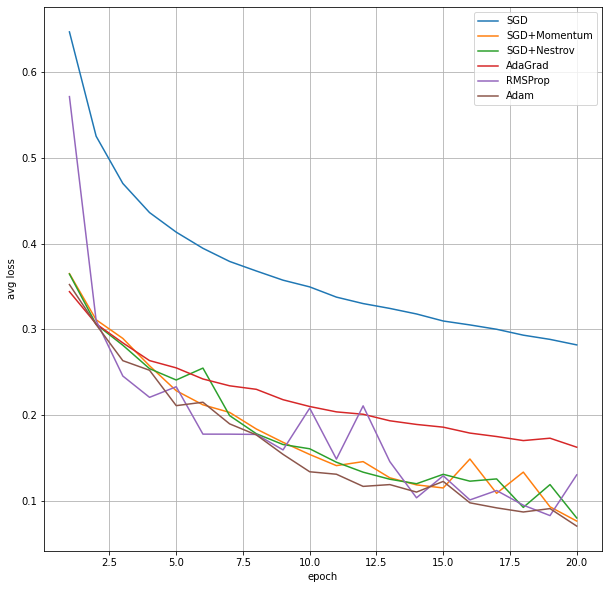

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.grid()
for name,loss_save_arr in loss_save_arrs.items():
  # print(loss_save_arr)
  plt.plot(range(1,epochs+1), loss_save_arr, label=name)

plt.legend(loc='upper right')